# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        residuals = X.dot(w) - y
        loss = np.mean(residuals ** 2)
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        residuals = X.dot(w) - y
        grad = (2 / y.shape[0]) * (X.T.dot(residuals))
        return grad

        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()  # Инициализируем веса
    trajectory = [w.copy()]  # История изменения весов

    for _ in range(n_iterations):
        # Считаем градиент и обновляем веса
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        trajectory.append(w.copy())

    return trajectory

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

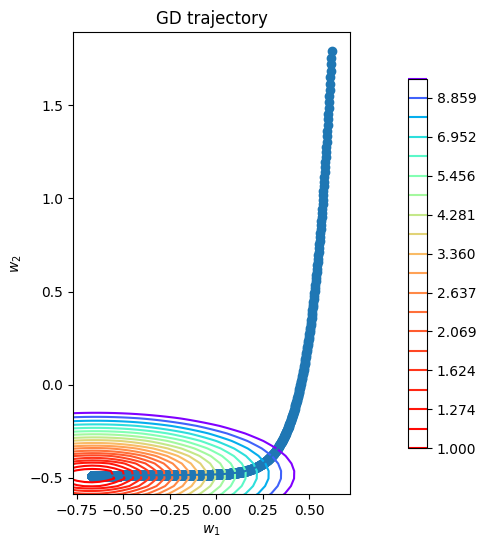

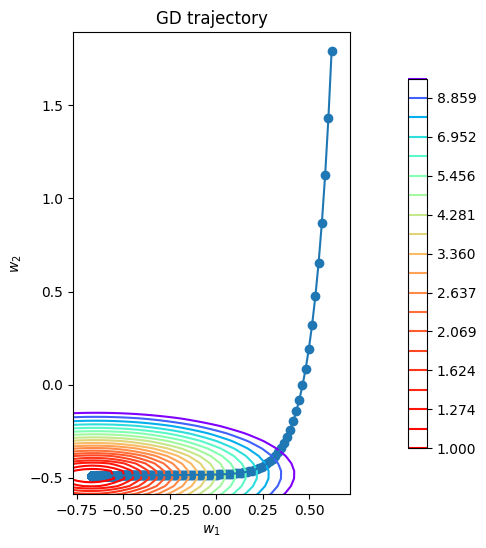

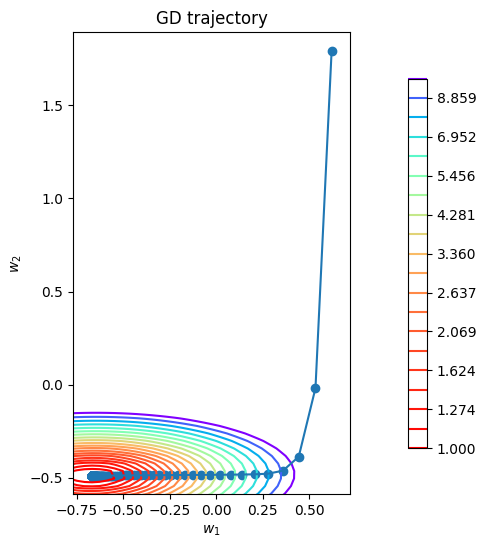

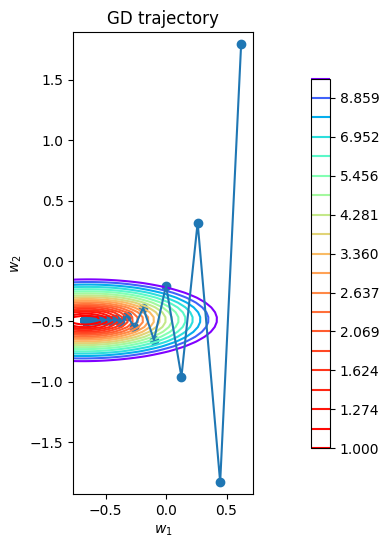

In [9]:
from matplotlib.gridspec import GridSpec
# Создаем список значений для lr
lr_values = [0.0001, 0.001, 0.005, 0.01]

# Запускаем градиентный спуск для каждого значения lr и визуализируем траекторию
for lr in lr_values:
    w_list = gradient_descent(w_init, X, y, loss, lr)
    plot_gd(w_list, X, y, loss)
plt.show()

Маленькое lr замедляет сходимость и может застрять в локальных минимумах
Среднее lr обычно дает хорошие результаты и быструю сходимость на гладких функциях потерь
Большое lr может привести к расходимости из-за слишком больших шагов


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()  # Инициализируем веса
    trajectory = [w.copy()]  # История изменения весов

    for _ in range(n_iterations):
        # Выбираем случайный батч из данных
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch, y_batch = X[batch_indices], y[batch_indices]

        # Считаем градиент и обновляем веса
        grad = loss.calc_grad(X_batch, y_batch, w)
        w = w - lr * grad
        trajectory.append(w.copy())

    return trajectory

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr=0.0001, batch_size=10:


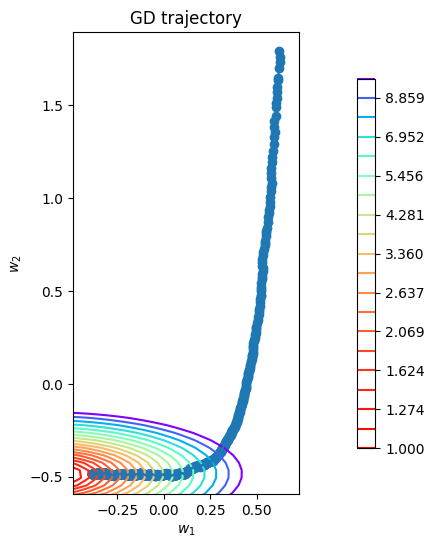

lr=0.0001, batch_size=20:


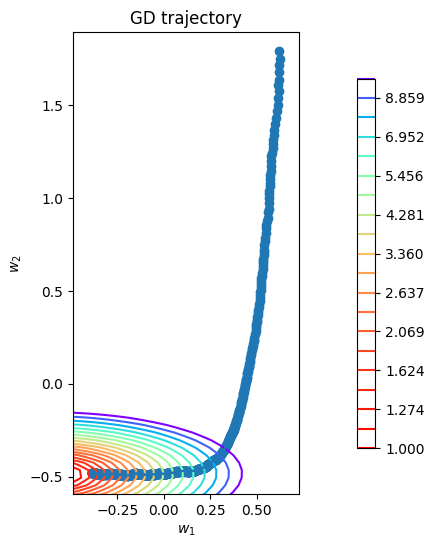

lr=0.0001, batch_size=50:


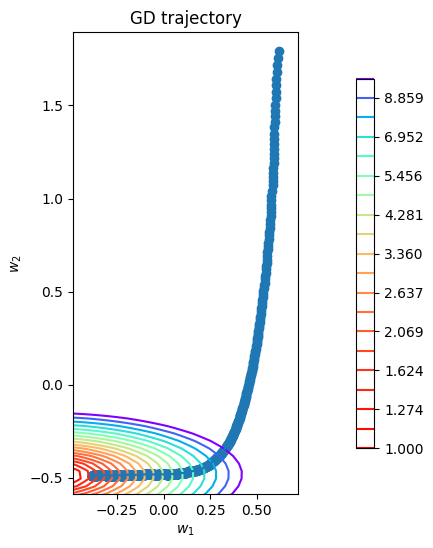

lr=0.0001, batch_size=100:


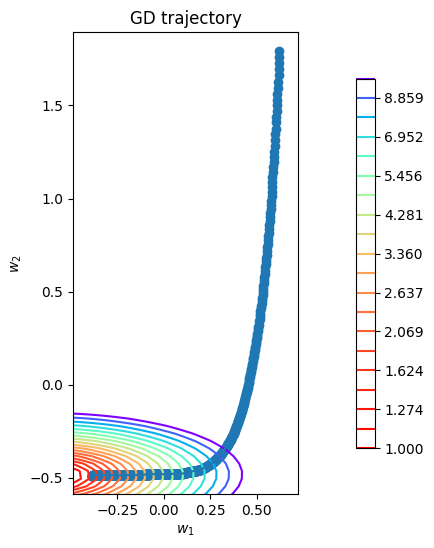

lr=0.001, batch_size=10:


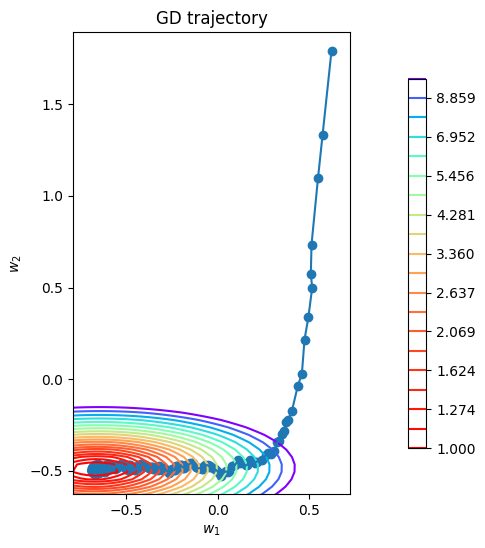

lr=0.001, batch_size=20:


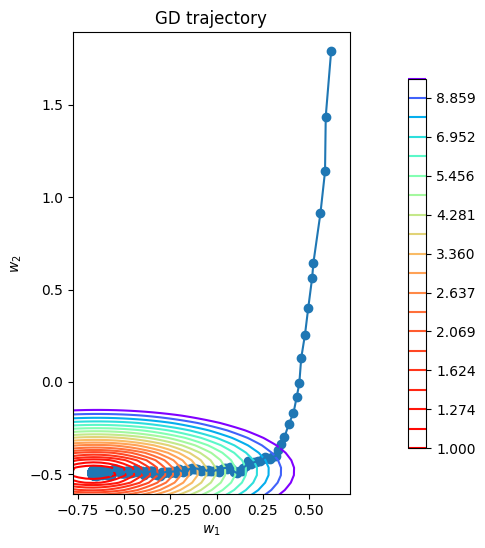

lr=0.001, batch_size=50:


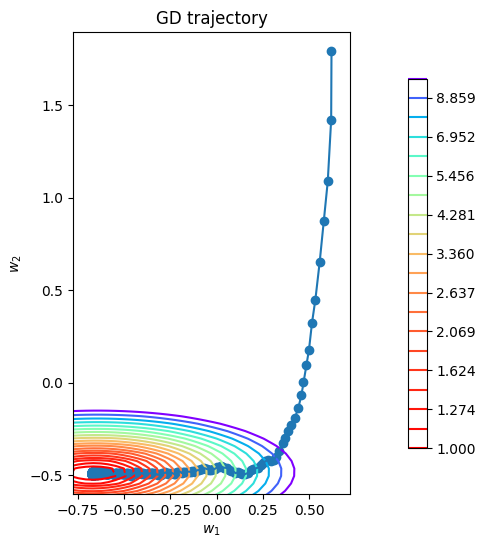

lr=0.001, batch_size=100:


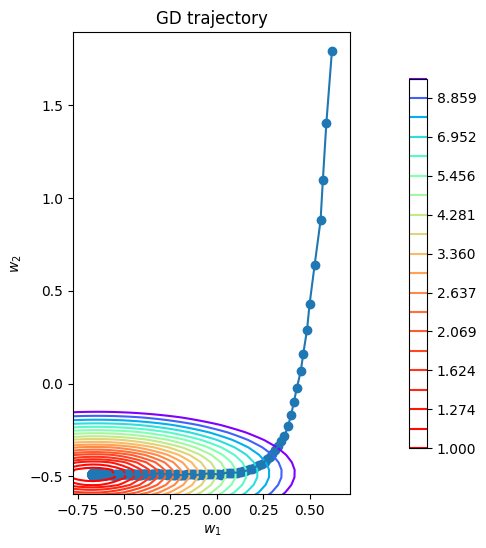

lr=0.005, batch_size=10:


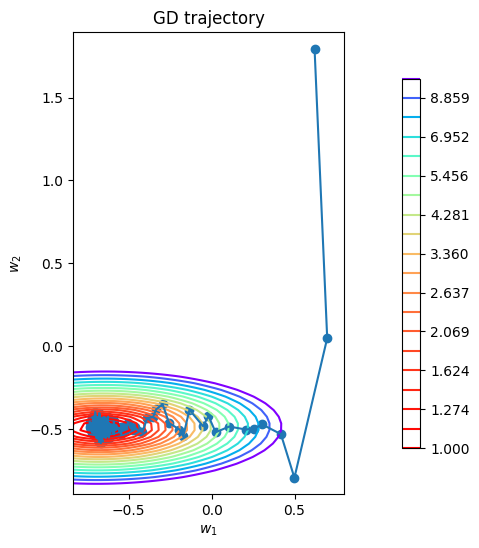

lr=0.005, batch_size=20:


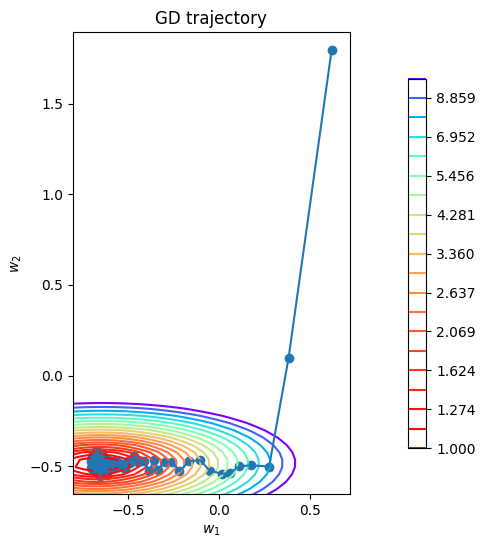

lr=0.005, batch_size=50:


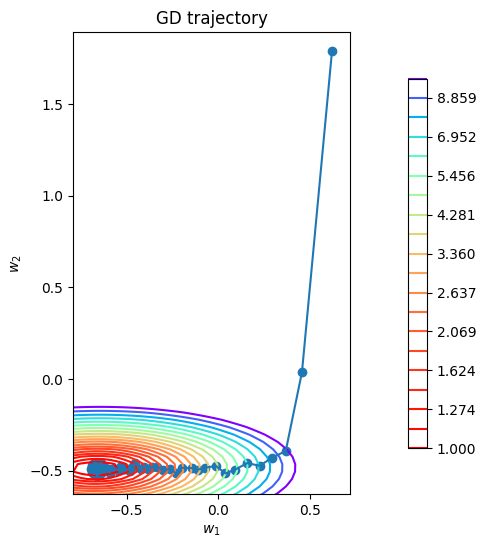

lr=0.005, batch_size=100:


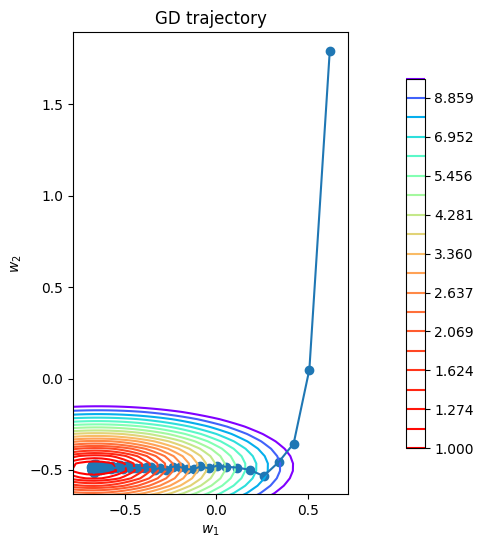

lr=0.01, batch_size=10:


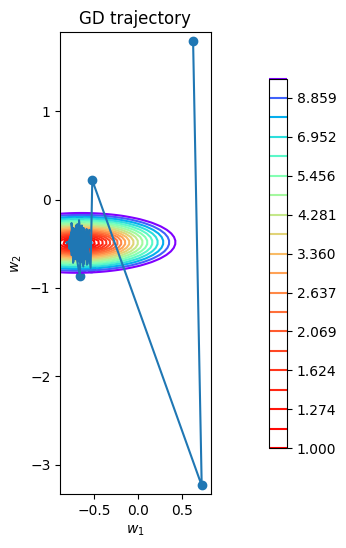

lr=0.01, batch_size=20:


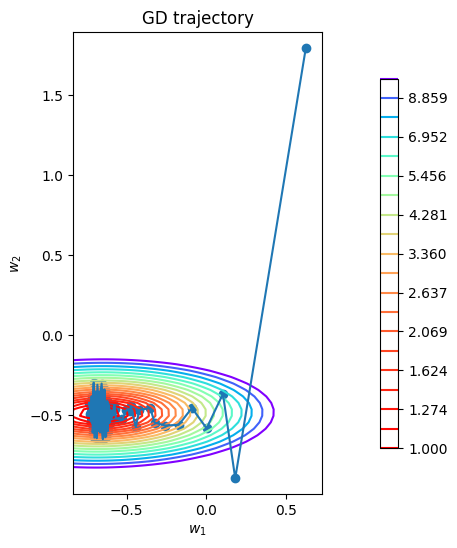

lr=0.01, batch_size=50:


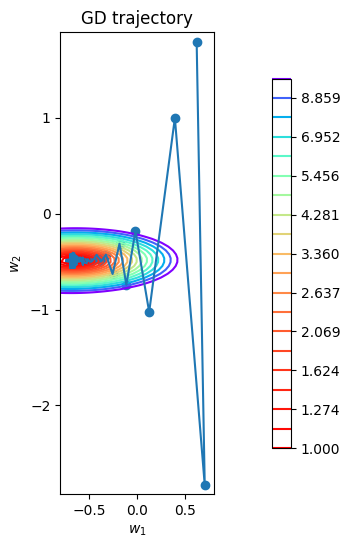

lr=0.01, batch_size=100:


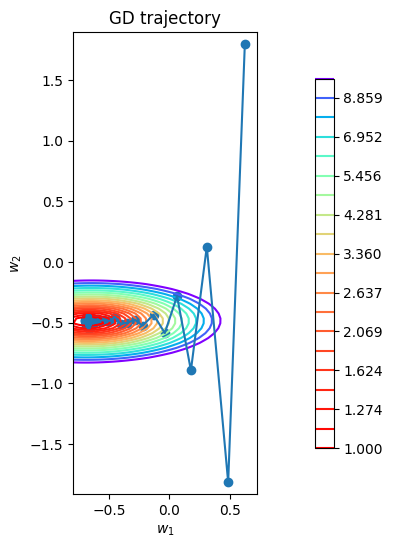

In [11]:
# Создаем список комбинаций значений lr и batch_size
lr_values = [0.0001, 0.001, 0.005, 0.01]
batch_size_values = [10, 20, 50, 100]

# Запускаем стохастический градиентный спуск для каждой комбинации и визуализируем траекторию
for lr in lr_values:
    for batch_size in batch_size_values:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
        print(f"lr={lr}, batch_size={batch_size}:")
        plot_gd(w_list, X, y, loss)



Маленький lr может замедлить сходимость, но делает обновления весов более стабильными. Большой lr может привести к быстрой сходимости, но рискует расходимостью

Меньший batch_size увеличивает стохастичность и может помочь избежать локальных минимумов, но также приводит к более зашумленным обновлениям весов. Больший batch_size дает более стабильные обновления и может ускорить сходимость, но уменьшает стохастичность и может застревать в локальных минимумах

Стохастический градиентный спуск обновляет веса на каждом объекте или небольшом подмножестве объектов, что ускоряет обучение, но может усложнить сходимость из-за более высокой стохастичности

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()  # Инициализируем веса
    trajectory = [w.copy()]  # История изменения весов

    for t in range(1, n_iterations + 1):
        # Выбираем случайный батч из данных
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch, y_batch = X[batch_indices], y[batch_indices]

        # Считаем длину шага для текущей итерации
        eta_t = lr * ((1.0 / t) ** p)

        # Считаем градиент и обновляем веса
        grad = loss.calc_grad(X_batch, y_batch, w)
        w = w - eta_t * grad
        trajectory.append(w.copy())

    return trajectory

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p=0.1:


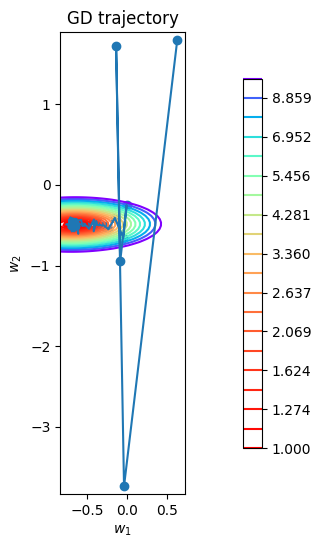

p=0.5:


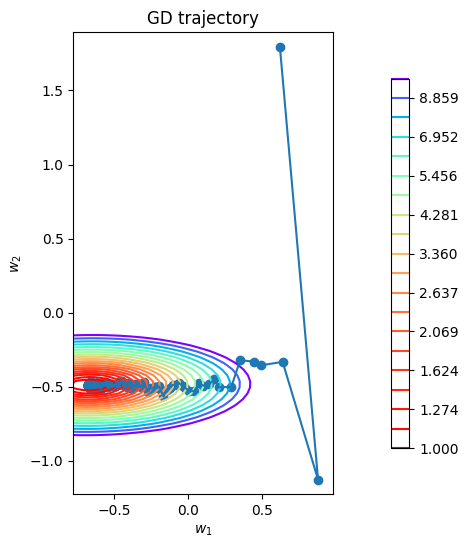

p=0.8:


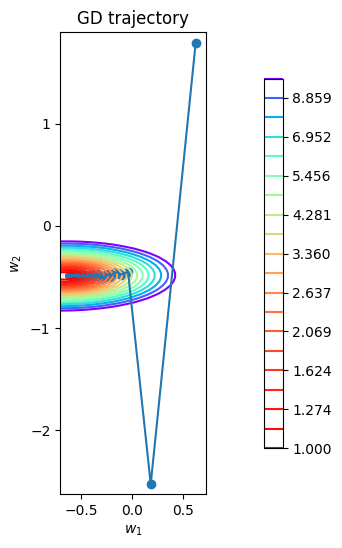

p=1.0:


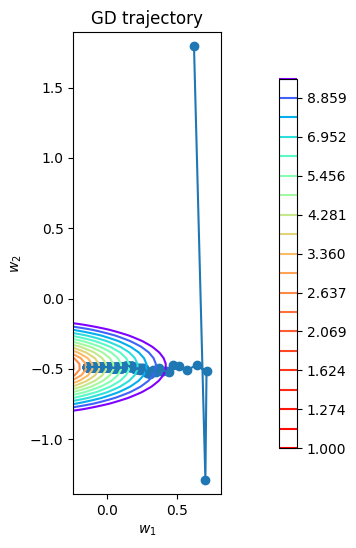

In [13]:
# Задаем параметры
lr = 0.01
batch_size = 10
p_values = [0.1, 0.5, 0.8, 1.0]

# Запускаем стохастический градиентный спуск для каждого значения параметра p
for p in p_values:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p)
    print(f"p={p}:")
    plot_gd(w_list, X, y, loss)


Значение параметра p влияет на частоту обновлений весов в стохастическом градиентном спуске. Более низкие значения делают обновления более частыми, что может ускорить сходимость, но сделать процесс менее стабильным. Более высокие значения p делают обновления более редкими, что может сделать процесс стабильнее, но замедлить сходимость

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

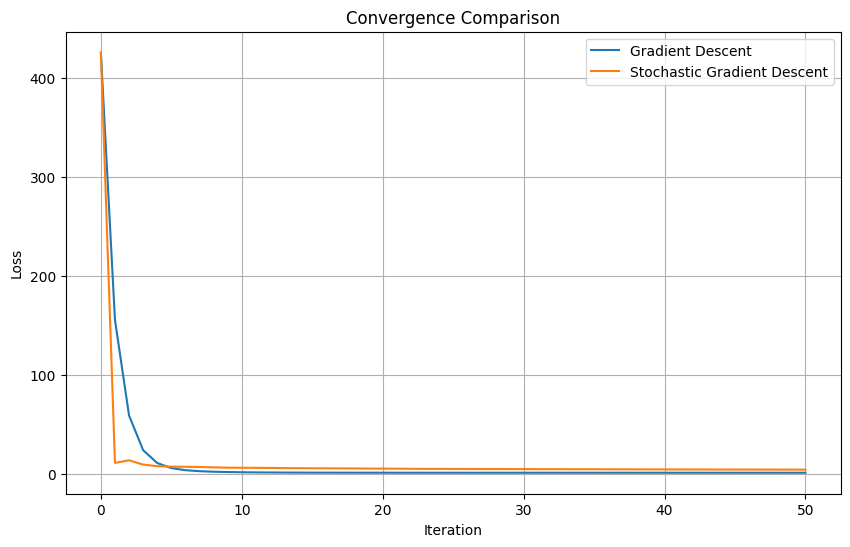

In [14]:
# Задаем параметры
lr = 0.01
batch_size = 10
n_iterations = 50

# Запускаем обычный градиентный спуск
w_list_gd = gradient_descent(w_init, X, y, loss, lr, n_iterations=n_iterations)

# Запускаем стохастический градиентный спуск
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p=1.0, n_iterations=n_iterations)

# Считаем значения функции потерь для каждой итерации
losses_gd = [loss.calc_loss(X, y, w) for w in w_list_gd]
losses_sgd = [loss.calc_loss(X, y, w) for w in w_list_sgd]

# Рисуем график
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations + 1), losses_gd, label='Gradient Descent')
plt.plot(range(n_iterations + 1), losses_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True)
plt.show()


Преимущество стохастического градиентного спуска видно на графике. Это может быть обусловлено тем, что стохастический градиентный спуск использует случайные подвыборки данных для вычисления градиента на каждой итерации, что может привести к более быстрой сходимости на некоторых задачах

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
# gradient_descent(
#     w_init: np.ndarray,
#     X: np.ndarray,
#     y: np.ndarray,
#     loss: BaseLoss,
#     lr: float,
#     n_iterations: int = 100000,
# )
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [18]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [19]:
# -- YOUR CODE HERE --
X_raw.drop(columns='index', inplace=True)
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

In [20]:
# Разделяем датасет на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)

# Заполняем пропуски
X_raw_numeric = X_raw.select_dtypes(exclude=['object'])
X_raw_object = X_raw.select_dtypes(['object'])
X_raw_numeric.fillna(X_raw_numeric.median(), inplace=True)
X_raw_object.fillna(X_raw_object.mode().iloc[0], inplace=True)

# Закодируем категориальные переменные
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_raw_object)
X_raw_object_encoded = pd.DataFrame(encoder.transform(X_raw_object), columns=encoder.get_feature_names_out())

# Нормализуем числовые признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_raw_numeric_normalized = pd.DataFrame(scaler.fit_transform(X_raw_numeric), columns=X_raw_numeric.columns)

# Объединяем все в один DataFrame
X_raw_processed = pd.concat([X_raw_object_encoded, X_raw_numeric_normalized], axis=1)

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(X_raw_processed, y, test_size=0.2, random_state=55)


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [21]:
# -- YOUR CODE HERE --
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [22]:
from sklearn.metrics import mean_squared_error

# Вычисляем ошибку на обучающей выборке
train_error = mean_squared_error(linear_regression.predict(X_train), y_train)

# Вычисляем ошибку на тестовой выборке
test_error = mean_squared_error(linear_regression.predict(X_test), y_test)

print(f'Ошибка на обучающей выборке: {train_error:.2f}')
print(f'Ошибка на тестовой выборке: {test_error:.2f}')


Ошибка на обучающей выборке: 1378326.64
Ошибка на тестовой выборке: 8106979.89


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [23]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        residuals = X.dot(w) - y
        loss = np.mean(residuals**2) + self.coef * np.linalg.norm(w[:-1])**2
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        residuals = X.dot(w) - y
        grad = 2 * X.T.dot(residuals) / len(y)
        grad[:-1] += 2 * self.coef * w[:-1]
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [24]:
linear_regression_2 = LinearRegression(MSEL2Loss(0.0001))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [25]:
# Обучаем регрессию на обучающей выборке
linear_regression_2.fit(X_train, y_train)

# Вычисляем ошибку на обучающей выборке
train_error_2 = mean_squared_error(linear_regression_2.predict(X_train), y_train)

# Вычисляем ошибку на тестовой выборке
test_error_2 = mean_squared_error(linear_regression_2.predict(X_test), y_test)

print(f'Ошибка на обучающей выборке с регуляризацией: {train_error_2:.2f}')
print(f'Ошибка на тестовой выборке с регуляризацией: {test_error_2:.2f}')

Ошибка на обучающей выборке с регуляризацией: 1380512.52
Ошибка на тестовой выборке с регуляризацией: 7943310.78


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [26]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X.dot(w) - y
        loss = np.mean(np.where(np.abs(z) < self.eps, 0.5 * z ** 2, self.eps * (np.abs(z) - 0.5 * self.eps)))
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X.dot(w) - y
        grad = X.T.dot(np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))) / len(y)
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [27]:
# Создаем экземпляр регрессии с лоссом HuberLoss
linear_regression_huber = LinearRegression(HuberLoss(5000))

# Обучаем регрессию на обучающей выборке
linear_regression_huber.fit(X_train, y_train)

# Вычисляем ошибку на обучающей выборке с HuberLoss
train_error_huber = mean_squared_error(linear_regression_huber.predict(X_train), y_train)

# Вычисляем ошибку на тестовой выборке с HuberLoss
test_error_huber = mean_squared_error(linear_regression_huber.predict(X_test), y_test)

print(f'Ошибка на обучающей выборке с HuberLoss: {train_error_huber:.2f}')
print(f'Ошибка на тестовой выборке с HuberLoss: {test_error_huber:.2f}')

# Теперь сравним с результатами с лоссом MSELoss
print(f'Ошибка на обучающей выборке с MSELoss: {train_error_2:.2f}')
print(f'Ошибка на тестовой выборке с MSELoss: {test_error_2:.2f}')


Ошибка на обучающей выборке с HuberLoss: 1378359.96
Ошибка на тестовой выборке с HuberLoss: 8101920.90
Ошибка на обучающей выборке с MSELoss: 1380512.52
Ошибка на тестовой выборке с MSELoss: 7943310.78


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

class SimulatedAnnealingLinearRegression:
    def __init__(self, loss, initial_temp=100, final_temp=10, cooling_rate=0.55, n_iterations=10000):
        """
        Инициализация алгоритма имитации отжига для линейной регрессии.

        :param loss: Объект функции потерь.
        :param initial_temp: Начальная температура.
        :param final_temp: Конечная температура.
        :param cooling_rate: Коэффициент охлаждения.
        :param n_iterations: Количество итераций.
        """
        self.loss = loss
        self.initial_temp = initial_temp
        self.final_temp = final_temp
        self.cooling_rate = cooling_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        """
        Обучение линейной регрессии с использованием алгоритма имитации отжига.

        :param X: Матрица признаков.
        :param y: Вектор целевых значений.
        """
        # Инициализация начального вектора весов
        n_features = X.shape[1]
        self.w = np.random.randn(n_features)

        # Инициализация лучшего вектора весов и его соответствующей ошибки
        self.best_w = np.copy(self.w)
        self.best_loss = float('inf')

        # Начальная темп
        temp = self.initial_temp

        # Итерация алгоритма
        for _ in range(self.n_iterations):
            # Генерация нового вектора весов
            new_w = self.w + np.random.standard_t(3, size=n_features)

            # Вычисление функции потерь для нового и текущего векторов весов
            new_loss = self.loss.calc_loss(X, y, new_w)
            current_loss = self.loss.calc_loss(X, y, self.w)

            # Обновление лучшего вектора весов и его соответствующей ошибки
            if new_loss < self.best_loss:
                self.best_loss = new_loss
                self.best_w = new_w

            # Принятие решения о переходе к новому вектору весов
            if new_loss < current_loss or np.random.rand() < np.exp((current_loss - new_loss) / temp):
                self.w = new_w

            # Обновление темп
            temp *= self.cooling_rate
            temp = max(temp, self.final_temp)

    def predict(self, X):
        """
        Предсказание целевых значений для новых данных.

        :param X: Матрица новых признаков.
        :return: Вектор предсказанных целевых значений.
        """
        return X.dot(self.best_w)

# Пример использования
simulated_annealing_regression = SimulatedAnnealingLinearRegression(MSELoss())
simulated_annealing_regression.fit(X_train, y_train)

# Вычисление ошибок на обучающей и тестовой выборках
train_error = mean_squared_error(simulated_annealing_regression.predict(X_train), y_train)
test_error = mean_squared_error(simulated_annealing_regression.predict(X_test), y_test)

print(f'Ошибка на обучающей выборке: {train_error:.2f}')
print(f'Ошибка на тестовой выборке: {test_error:.2f}')


Ошибка на обучающей выборке: 14296896.36
Ошибка на тестовой выборке: 28801483.90
